## Aula 1 - Carregando o dataset

In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

In [3]:
len(imagens_treino), len(imagens_teste)

(60000, 10000)

In [4]:
imagens_treino.shape

(60000, 28, 28)

In [5]:
imagens_teste.shape

(10000, 28, 28)

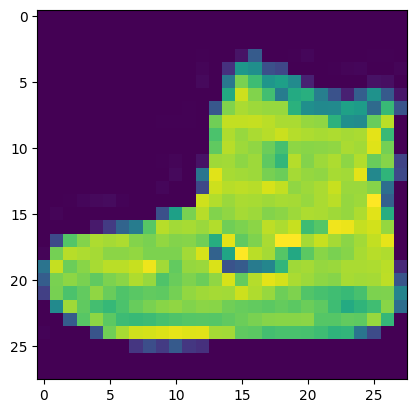

In [6]:
plt.imshow(imagens_treino[0])

## Aula 2 - Começando a montar o modelo

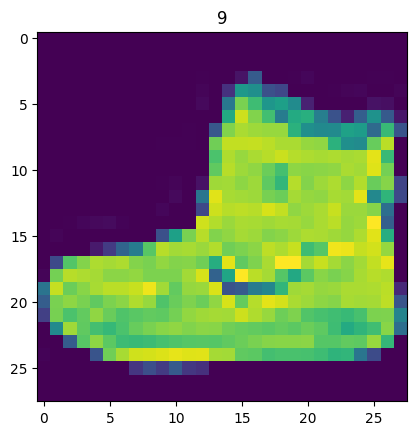

In [7]:
plt.title(identificacoes_treino[0])
plt.imshow(imagens_treino[0])

In [8]:
identificacoes_treino.min(), identificacoes_treino.max()

(0, 9)

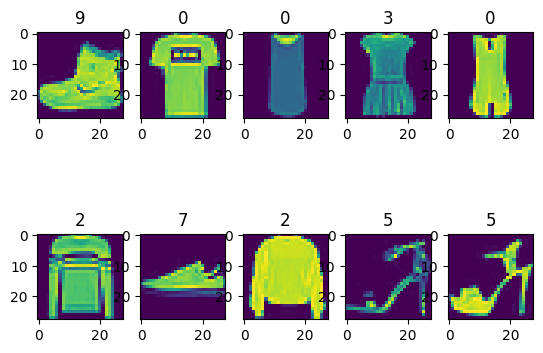

In [9]:
for imagem in range(10):
    plt.subplot(2, 5, imagem+1)
    plt.imshow(imagens_treino[imagem])
    plt.title(identificacoes_treino[imagem])

In [10]:
nome_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco', 'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']

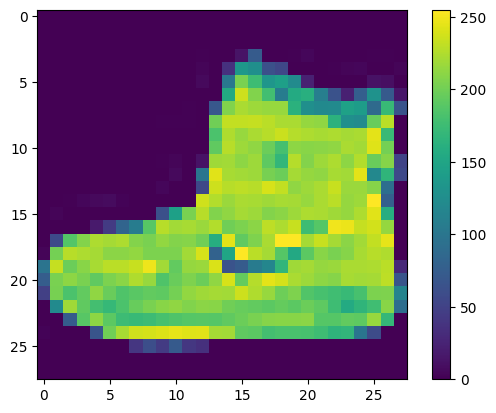

In [11]:
"""
for imagem in range(10):
    plt.subplot(2, 5, imagem+1)
    plt.imshow(imagens_treino[imagem])
    plt.title(nome_de_classificacoes[identificacoes_treino[imagem]])
"""
plt.imshow(imagens_treino[0])
plt.colorbar()

## Aula 2 - Começando a montar o modelo

In [12]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28))
])

## Aula 3 - Adicionando camadas ocultas

In [13]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # entrada
    keras.layers.Dense(256, activation=tensorflow.nn.relu), # processamento
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)# saida
])


#modelo.fit(imagens_treino, identificacoes_treino)

## Aula 4 - Ensinando o modelo

In [14]:
# normalização
imagens_treino = imagens_treino/float(255)

In [15]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # entrada
    keras.layers.Dense(256, activation=tensorflow.nn.relu), # processamento
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)# saida
])

modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy')

modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.4850


In [16]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # entrada
    keras.layers.Dense(256, activation=tensorflow.nn.relu), # processamento
    keras.layers.Dense(128, activation=tensorflow.nn.relu),
    keras.layers.Dense(64, activation=tensorflow.nn.relu),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)# saida
])

modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy')

modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.4891


## Aula 5 - Sabendo como medir o resultado do modelo

In [17]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # entrada
    keras.layers.Dense(256, activation=tensorflow.nn.relu), # processamento
    keras.layers.Dropout(0.2),
    #keras.layers.Dense(128, activation=tensorflow.nn.relu),
    #keras.layers.Dense(64, activation=tensorflow.nn.relu),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)# saida
])

modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy')

modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.5044


In [18]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # entrada
    keras.layers.Dense(256, activation=tensorflow.nn.relu), # processamento
    keras.layers.Dropout(0.2),
    #keras.layers.Dense(128, activation=tensorflow.nn.relu),
    #keras.layers.Dense(64, activation=tensorflow.nn.relu),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)# saida
])

modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy', metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5267 - accuracy: 0.8135 - val_loss: 0.4106 - val_accuracy: 0.8552
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3961 - accuracy: 0.8560 - val_loss: 0.3690 - val_accuracy: 0.8672
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3600 - accuracy: 0.8689 - val_loss: 0.3440 - val_accuracy: 0.8745
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3399 - accuracy: 0.8741 - val_loss: 0.3481 - val_accuracy: 0.8737
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3215 - accuracy: 0.8809 - val_loss: 0.3351 - val_accuracy: 0.8775


In [19]:
testes = modelo.predict(imagens_teste)

313/313 [==============================] - 0s 1ms/step


In [20]:
np.argmax(testes[2])

1

In [21]:
identificacoes_teste[2]

1

In [22]:
modelo.evaluate(imagens_teste, identificacoes_teste)

313/313 [==============================] - 0s 1ms/step - loss: 55.1443 - accuracy: 0.8588


[55.14430618286133, 0.8587999939918518]

## Aula 6 - Ajustando e salvando o modelo

In [23]:
historico.history

{'loss': [0.5266786813735962,
  0.396107017993927,
  0.359986275434494,
  0.3398730754852295,
  0.3215399384498596],
 'accuracy': [0.8134583234786987,
  0.8559583425521851,
  0.8688958287239075,
  0.8741250038146973,
  0.8809166550636292],
 'val_loss': [0.41059139370918274,
  0.36902308464050293,
  0.3439515233039856,
  0.3480645716190338,
  0.3350551426410675],
 'val_accuracy': [0.8551666736602783,
  0.8671666383743286,
  0.8744999766349792,
  0.8737499713897705,
  0.8774999976158142]}

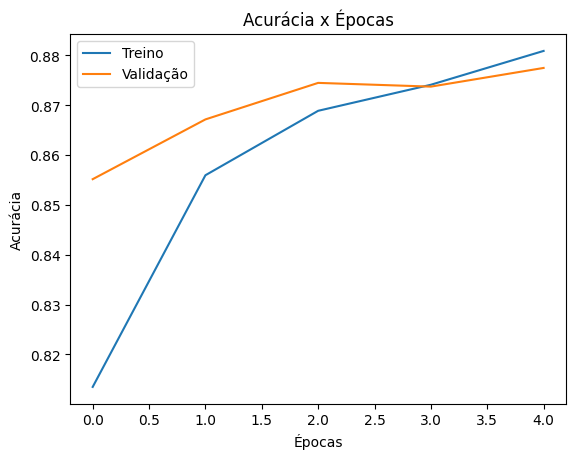

In [24]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia x Épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'])

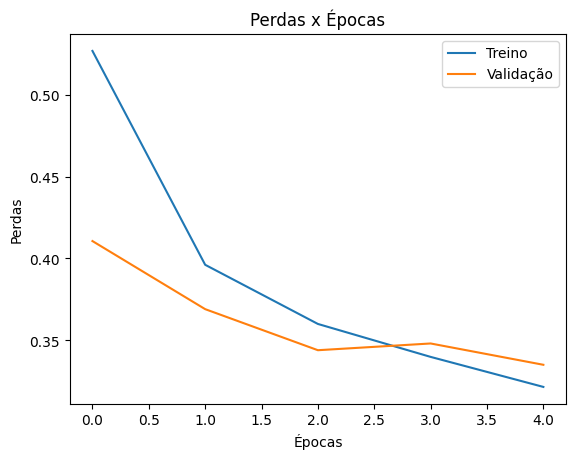

In [25]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perdas x Épocas')
plt.xlabel('Épocas')
plt.ylabel('Perdas')
plt.legend(['Treino', 'Validação'])

In [26]:
from tensorflow.keras.models import load_model

modelo.save('modelo.keras')
modelo_salvo = load_model('modelo.keras')

In [27]:
testes = modelo.predict(imagens_teste)
print('resultado teste: ', np.argmax(testes[1]))
print('numero da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('numero da imagem de teste:', identificacoes_teste[1])

313/313 [==============================] - 0s 1ms/step
resultado teste:  2
numero da imagem de teste: 2
313/313 [==============================] - 0s 1ms/step
resultado teste modelo salvo: 2
numero da imagem de teste: 2


In [28]:
modelo.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               200960    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense

array([[ 0.06941351, -0.04653615, -0.04180637, ...,  0.03122716,
        -0.13539435,  0.03456407],
       [ 0.0943173 , -0.03146278,  0.00607589, ..., -0.03985244,
         0.06444674,  0.0950743 ],
       [-0.10937919, -0.06918801,  0.04311898, ..., -0.05275278,
        -0.07321835,  0.06049944],
       ...,
       [-0.19085078, -0.01303236,  0.08947133, ...,  0.14677478,
        -0.03337687, -0.2198737 ],
       [-0.2505258 ,  0.02451906,  0.02204806, ..., -0.01505546,
        -0.06741196, -0.10229871],
       [-0.04181963,  0.03735889, -0.00225393, ..., -0.00164722,
        -0.04137358,  0.10633049]], dtype=float32)

In [30]:
pesos_camada_dense.shape
pesos_camada_dense_zerados = np.zeros((784, 256))
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense
modelo.layers[1].set_weights([pesos_camada_dense_zerados, vieses_camada_dense])
modelo.layers[1].get_weights()

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([-0.08384982, -0.01107756,  0.28808194,  0.01491923, -0.04626997,
         0.0128421 , -0.09631904, -0.19183685,  0.18663661,  0.0065507 ,
        -0.02602217,  0.13890466, -0.16299663, -0.4368485 ,  0.04195047,
         0.16754855,  0.21624357,  0.20609598,  0.27733943,  0.10024046,
         0.24578358,  0.35245156,  0.01885372, -0.06752874,  0.14021929,
         0.28318217,  0.23858647, -0.01600581, -0.00735963, -0.0164811 ,
         0.15821089, -0.04841702,  0.41821143,  0.01786098,  0.34801528,
         0.32871607,  0.37333694,  0.17153686,  0.17618793,  0.16707191,
        -0.04114167,  0.1798409 , -0.00885109,  0.09276878,  0.01888087,
         0.00578444,  0.01663931, -0.02661084,  0.12827697,  0.02729409,
      

In [31]:
modelo.layers[1].set_weights([pesos_camada_dense_zerados, vieses_camada_dense])

In [32]:
modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics = ['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5304 - accuracy: 0.8089 - val_loss: 0.4241 - val_accuracy: 0.8474
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4079 - accuracy: 0.8500 - val_loss: 0.3661 - val_accuracy: 0.8672
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3733 - accuracy: 0.8634 - val_loss: 0.3561 - val_accuracy: 0.8695
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3483 - accuracy: 0.8713 - val_loss: 0.3417 - val_accuracy: 0.8768
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3316 - accuracy: 0.8757 - val_loss: 0.3411 - val_accuracy: 0.8787


In [33]:
historico.history

{'loss': [0.5304279923439026,
  0.40793073177337646,
  0.3733345866203308,
  0.34832170605659485,
  0.3316407799720764],
 'accuracy': [0.8089166879653931,
  0.8500416874885559,
  0.8633750081062317,
  0.8713124990463257,
  0.8756874799728394],
 'val_loss': [0.424140989780426,
  0.3661080598831177,
  0.3560727834701538,
  0.3417235016822815,
  0.3410598635673523],
 'val_accuracy': [0.8474166393280029,
  0.8671666383743286,
  0.8694999814033508,
  0.8768333196640015,
  0.8786666393280029]}

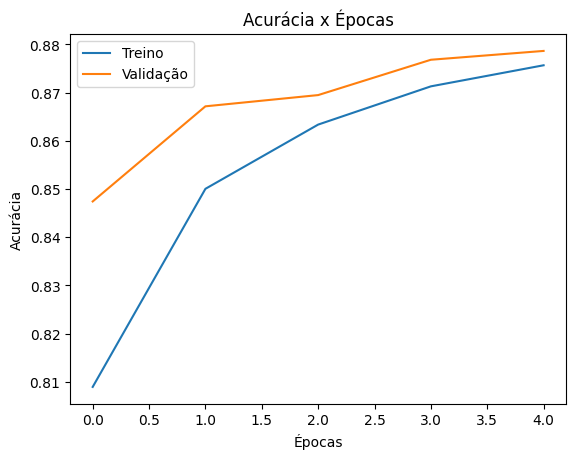

In [34]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia x Épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'])

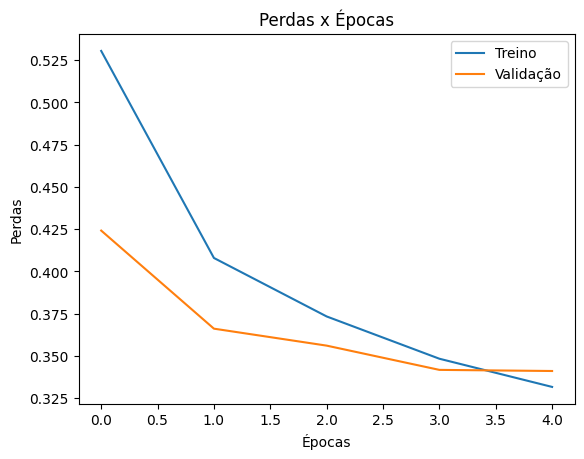

In [35]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perdas x Épocas')
plt.xlabel('Épocas')
plt.ylabel('Perdas')
plt.legend(['Treino', 'Validação'])

In [36]:
pesos_camada_dense.shape
pesos_camada_dense_zerados = np.zeros((784, 256))
pesos_camada_dense_aleatorios = np.random.rand(784, 256)


modelo.layers[1].set_weights([pesos_camada_dense_aleatorios,
                              vieses_camada_dense])

modelo.layers[1].get_weights()

modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics = ['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 116.2447 - accuracy: 0.4155 - val_loss: 15.8128 - val_accuracy: 0.7177
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 32.1828 - accuracy: 0.6316 - val_loss: 10.6125 - val_accuracy: 0.7689
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 15.0181 - accuracy: 0.6960 - val_loss: 6.7558 - val_accuracy: 0.7466
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 7.2581 - accuracy: 0.7357 - val_loss: 4.2130 - val_accuracy: 0.7946
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 3.9559 - accuracy: 0.7538 - val_loss: 2.5247 - val_accuracy: 0.7995


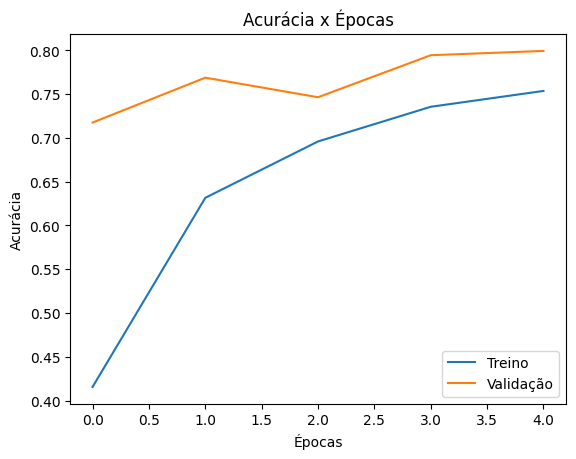

In [37]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia x Épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'])

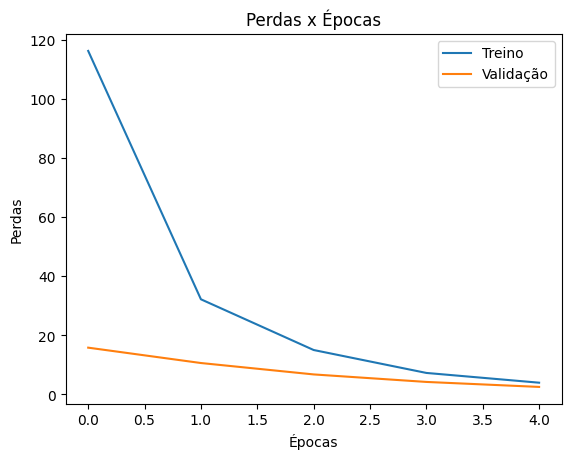

In [38]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perdas x Épocas')
plt.xlabel('Épocas')
plt.ylabel('Perdas')
plt.legend(['Treino', 'Validação'])

In [40]:
modelo.get_config()

{'name': 'sequential_5',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_5_input'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Flatten',
   'config': {'name': 'flatten_5',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last'},
   'registered_name': None,
   'build_config': {'input_shape': (None, 28, 28)}},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_10',
    'trainable': True,
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_n

In [42]:
vieses_camada_dense_zerados = np.zeros((256,))
modelo.layers[1].set_weights([pesos_camada_dense_zerados,
                              vieses_camada_dense_zerados])

In [47]:
adam = keras.optimizers.Adam(lr=0.5)

modelo.compile(optimizer=adam, 
               loss='sparse_categorical_crossentropy',
               metrics = ['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0982 - val_loss: 2.3027 - val_accuracy: 0.0983
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0971 - val_loss: 2.3028 - val_accuracy: 0.1005
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0995 - val_loss: 2.3028 - val_accuracy: 0.0995
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0994 - val_loss: 2.3027 - val_accuracy: 0.0957
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 2.3027 - accuracy: 0.0997 - val_loss: 2.3029 - val_accuracy: 0.0995


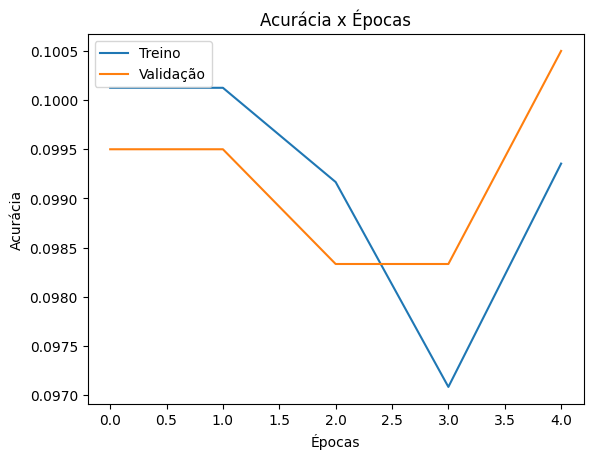

In [44]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia x Épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'])

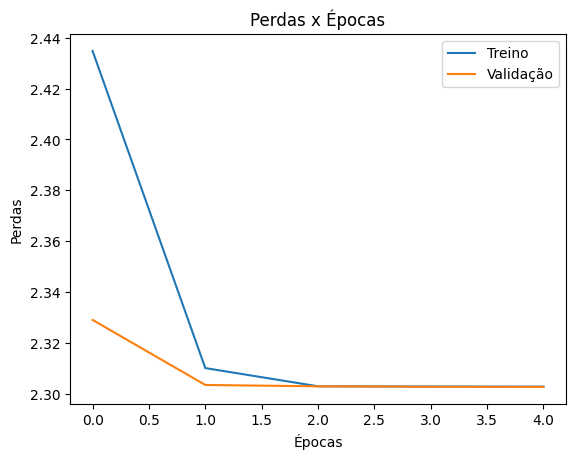

In [45]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perdas x Épocas')
plt.xlabel('Épocas')
plt.ylabel('Perdas')
plt.legend(['Treino', 'Validação'])